In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [2]:
data = pd.read_csv("Walmart.csv").to_numpy()
print(data[:5])

dates = np.array([[dat[1], dat[2]] for dat in [da.split("-") for da in data[:, 1]]]).astype(np.int32)

shops = data[:, 0].astype(np.int32)
unique_shops = np.unique(shops)
category_to_index = {category: index for index, category in enumerate(unique_shops)}
ohe = np.zeros((data.shape[0], len(unique_shops)))

for i, shop in enumerate(shops):
    index = category_to_index[shop]
    ohe[i, index] = 1

X_train = np.hstack([data[:, 3:], dates, ohe]).astype(np.float64)
Y_train = data[:, 2].reshape(-1, 1).astype(np.float64)
print(X_train.shape, Y_train.shape)

print(X_train.dtype)
print(Y_train.dtype)
pd.to_datetime("2024-12-12")
print(ohe)

[[1 '05-02-2010' 1643690.9 0 42.31 2.572 211.0963582 8.106]
 [1 '12-02-2010' 1641957.44 1 38.51 2.548 211.2421698 8.106]
 [1 '19-02-2010' 1611968.17 0 39.93 2.514 211.2891429 8.106]
 [1 '26-02-2010' 1409727.59 0 46.63 2.561 211.3196429 8.106]
 [1 '05-03-2010' 1554806.68 0 46.5 2.625 211.3501429 8.106]]
(6435, 52) (6435, 1)
float64
float64
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


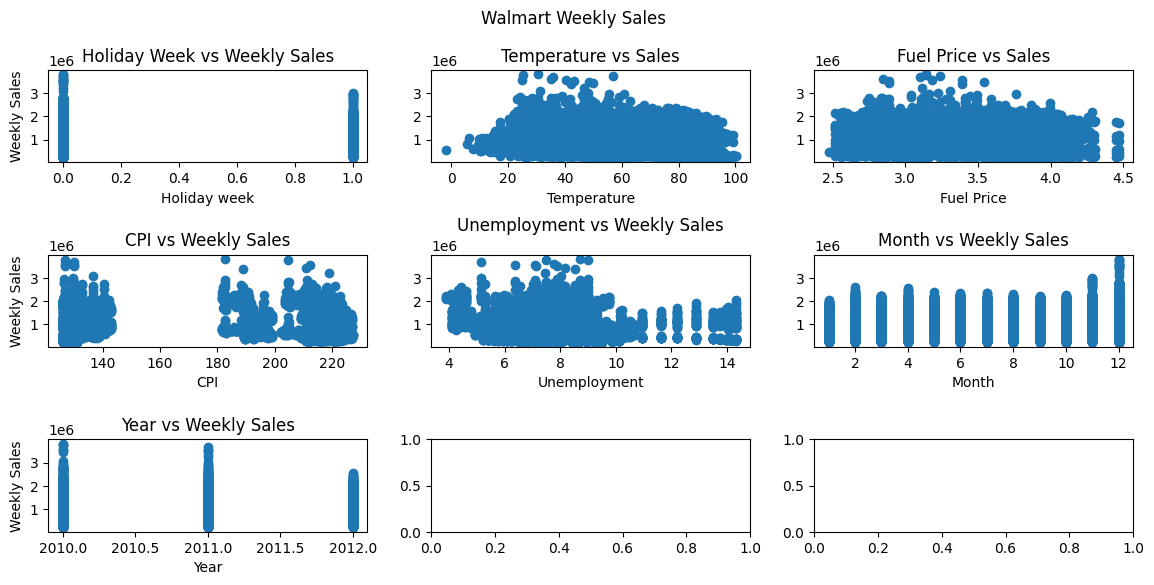

In [3]:
fig, axs = plt.subplots(3, 3, figsize=(14, 6))
fig.suptitle("Walmart Weekly Sales")

axs[0,0].scatter(X_train[:, 0].reshape(-1,1), Y_train)
axs[0,0].set_xlabel("Holiday week")
axs[0,0].set_ylabel("Weekly Sales")
axs[0,0].set_title("Holiday Week vs Weekly Sales")

axs[0,1].scatter(X_train[:, 1].reshape(-1,1), Y_train)
axs[0,1].set_xlabel("Temperature")
axs[0,1].set_title("Temperature vs Sales")

axs[0,2].scatter(X_train[:,2].reshape(-1,1), Y_train)
axs[0,2].set_xlabel("Fuel Price")
axs[0,2].set_title("Fuel Price vs Sales")

axs[1,0].scatter(X_train[:,3].reshape(-1,1), Y_train)
axs[1,0].set_xlabel("CPI")
axs[1,0].set_ylabel("Weekly Sales")
axs[1,0].set_title("CPI vs Weekly Sales")

axs[1,1].scatter(X_train[:,4].reshape(-1, 1), Y_train)
axs[1,1].set_xlabel("Unemployment")
axs[1,1].set_title("Unemployment vs Weekly Sales")

axs[1,2].scatter(X_train[:,5].reshape(-1, 1), Y_train)
axs[1,2].set_xlabel("Month")
axs[1,2].set_title("Month vs Weekly Sales")

axs[2,0].scatter(X_train[:,6].reshape(-1,1), Y_train)
axs[2,0].set_xlabel("Year")
axs[2,0].set_ylabel("Weekly Sales")
axs[2,0].set_title("Year vs Weekly Sales")

plt.subplots_adjust(hspace=1)
plt.show()

In [4]:
def z_score(x):
    mu = np.mean(x, axis = 0)
    sig = np.std(x, axis=0)
    return ((x-mu)/sig), mu, sig


x_norm, x_mu, x_sig = z_score(X_train)
y_norm, y_mu, y_sig = z_score(Y_train)

In [5]:
def compute_mse(x, y, w, b, lambda_):
    m = x.shape[0]
    fwb = x@w + b
    cst = (1/(2*m))*np.sum((fwb-y)**2)
    regcst = (lambda_/(2*m))*np.sum(w**2)
    return cst + regcst

def compute_gradient(x, y, w, b, lambda_):
    m = x.shape[0]
    fwb = x@w + b
    err = fwb - y
    dj_dw = (1/m)*x.T@err + (lambda_/m)*w
    dj_db = (1/m)*np.sum(err)

    return dj_dw, dj_db

def gradient_descent(x, y, wi, b, alpha, iter, lambda_):
    w = copy.deepcopy(wi)
    j_hist = []

    for i in range(iter):
        if(i < 10000):
            j_hist.append([compute_mse(x, y, w, b, lambda_), i])
        
        if(i%np.ceil(iter/10) == 0):
            print(f"Iteration: {i}, Cost: {j_hist[-1][0]:.2e}, w: {[f"{we:.2e}" for we in w.flatten()]}, b: {b:.2e}")
        
        dj_dw, dj_db = compute_gradient(x, y, w, b, lambda_)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

    return w, b, np.array(j_hist)

In [6]:
wi = np.zeros(x_norm[0].shape).reshape(-1,1)
bi = 0
alpha_ = 1e-1
iter = 10000
lambda_ = 40

w, b, j_hist = gradient_descent(x_norm, y_norm, wi, bi, alpha_, iter, lambda_)

Iteration: 0, Cost: 5.00e-01, w: ['0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00'], b: 0.00e+00
Iteration: 1000, Cost: 3.94e-02, w: ['1.73e-02', '-6.14e-02', '7.38e-03', '-2.50e-02', '-9.16e-02', '8.27e-02', '-2.32e-02', '1.37e-01', '2.34e-01', '-1.63e-01', '2.55e-01', '-1.93e-01', '1.34e-01', '-1.27e-01', '-4.38e-02', '-1.36e-01', '2.25e-01', '8.50e-02', '2.68e-02', '2.34e-01', '2.57e-01', '-1.18e-01', '-1.53e-01', '-6.1

In [7]:
from sklearn.metrics import r2_score

print(f"Accuracy:{r2_score(y_norm, x_norm@w + b)*100}")
print(w.shape)
w_denorm = w * (y_sig / x_sig.reshape(-1, 1))
b_denorm = b * y_sig + y_mu - np.sum(w_denorm * x_mu.reshape(-1, 1))
print(w_denorm.shape)

Accuracy:92.67777360125626
(52, 1)
(52, 1)


In [8]:
storeInput = int(input("Enter store number (1-45): "))
dateInput = input("Enter Date (ex: 20-11-2011): ")
holidayWeek = int(input("Enter Holiday week? (0 or 1): "))
temperatureInput = float(input("Enter Average Temperature of this Week: "))
fuelInput = float(input("Enter Average Fuel Price for this week"))
CPIInput = float(input("Enter CPI: "))
UnemploymentInput = float(input("Enter Average Unemployment for this week"))

storei = np.array([1 if storeInput - 1 == i else 0 for i in range(45)])
day, month, year = map(int, dateInput.split("-"))
monthi, yeari = month, year

primaryInputs = np.array([holidayWeek, temperatureInput, fuelInput, CPIInput, UnemploymentInput, monthi, yeari])

finalInputs = np.hstack([primaryInputs, storei])

print(finalInputs.shape)

output = finalInputs.reshape(1,-1)@w_denorm + b_denorm
print(output)

ValueError: invalid literal for int() with base 10: 'a'

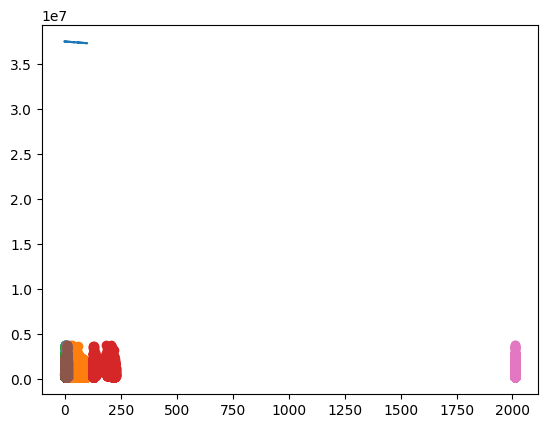

In [23]:
# print(X_train.shape, Y_train.shape)
plt.scatter(X_train[:,0], Y_train)
plt.scatter(X_train[:,1], Y_train)
plt.scatter(X_train[:,2], Y_train)
plt.scatter(X_train[:,3], Y_train)
plt.scatter(X_train[:,4], Y_train)
plt.scatter(X_train[:,5], Y_train)
plt.scatter(X_train[:,6], Y_train)
plt.plot(X_train, X_train[:,1].reshape(-1,1)@w_denorm[1].reshape(-1,1) + b_denorm)
plt.show()

# print(X_train[0].shape, w_denorm[0].shape)
# print(X_train[:,1].reshape(-1,1)@w_denorm[1].reshape(-1,1) + b_denorm)
# print(X_train[:,1].reshape(-1,1))